# Statistics for Data Science
Lecture 7  
In-class assignment 7.1  
Experiment with Beta priors and prior/posterior calculations

In [1]:
# Import packages
# in a terminal (set to your virtual environment): pip install ipywidgets prettytable

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy import stats
from prettytable import PrettyTable

# Step 1

In [2]:
# Create interactive plot of beta distribution (no need to be able to do this yourself at this moment)
def plot_beta(alpha=1.0, beta=1.0):
    x = np.linspace(0.001, 0.999, 1000)
    y = stats.beta(alpha,beta).pdf(x)
    
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, label=f'Density of Beta({round(alpha,3)}, {round(beta,3)})')
    plt.title('Interactive plot of Beta density')
    plt.xlabel('prob')
    plt.ylabel('density')
    plt.ylim(0, y.max()*1.1)
    plt.legend()
    plt.grid(True)
    plt.show()
    
interact(
    plot_beta,
    alpha=FloatSlider(value=0.5, min=0.1, max=10.0, step=0.1, description='alpha'),
    beta =FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='beta')
);

interactive(children=(FloatSlider(value=0.5, description='alpha', max=10.0, min=0.1), FloatSlider(value=1.0, d…

# Questions 
(use the sliders to change alpha and beta in the plot => you can also use the arrow keys)
- When do you get a symmetric distribution?
- How do you code a belief that the probability is above 0.8?
- You may also want to use the `stats.beta(a,b).pdf(x)`, `stats.beta(a,b).cdf(x)`, `stats.beta(a,b).rvs(n)`, `stats.beta(a,b).ppf(q)`, and `stats.beta(a,b).mean()` functions
- How do you code a belief that the probability is extreme (close to 0 or close to 1)?

# Step 2

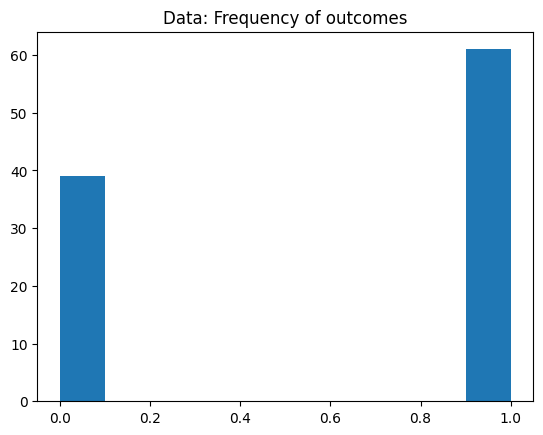

In [3]:
# Create some data from a Bernouilli distribution
np.random.seed(12345) # To ensure reproducability

N = 100
p_true = 0.7
data = stats.binom(p=p_true, n=1).rvs(N)

plt.hist(data)
plt.title("Data: Frequency of outcomes");

Maximum likelihood/frequentist estimator of probability of heads equals

In [4]:
data.mean()

np.float64(0.61)

In [6]:
# Some code to create an interactive plot of prior, likelihood and posterior (no need to understand details)

def log_likelihood(p):
   return np.sum(np.log(p)*data + np.log(1-p)*(1-data))

def plot_posterior(alpha=1.0, beta=1.0):
    x = np.linspace(0.001, 0.999, 1000)   
    prior = stats.beta(alpha,beta)
    priorpdf = prior.pdf(x)
    
    plt.figure(figsize=(10, 4))
    plt.plot(x, priorpdf, label=f'Prior Beta({round(alpha,3)}, {round(beta,3)})')
    # plt.title('Interactive plot of Beta density')
      
    llik = [log_likelihood(p) for p in x]

    llik = llik - np.max(llik) + np.log(stats.beta(data.sum(), data.size - data.sum()).pdf(data.mean()))
    lik  = np.exp(llik)
    
    plt.plot(x, lik, label=f'Likelihood (scaled)')
    
    posterior = stats.beta(alpha +data.sum(), beta + data.size - data.sum())
    posteriorpdf = posterior.pdf(x)
    plt.plot(x, posteriorpdf, label=f'Posterior')
    
    table = PrettyTable()
    table.field_names = ['', "Point estimate", "Est.Var", "Est.Std", "Interval Low", "Interval High"]
    table.add_row(["Prior", prior.mean(), prior.var(), prior.std(), prior.ppf(0.025), prior.ppf(0.975)])
    table.add_row(["Posterior", posterior.mean(), posterior.var(), posterior.std(), posterior.ppf(0.025), posterior.ppf(0.975)])
    
    stderrmean = np.sqrt(data.var(ddof=1)/data.size)
    table.add_row(["Frequentist", data.mean(), stderrmean**2, stderrmean, data.mean() - stats.t(data.size-1).ppf(0.975)*stderrmean, data.mean() + stats.t(data.size-1).ppf(0.975)*stderrmean])
    table.float_format = ".3"
    
    print("Estimation statistics")
    print(table)
    
    plt.xlabel('prob')
    plt.ylabel('density')
    plt.title('Prior (blue) x Likelihood (orange) = Posterior (green)')
    plt.ylim(0, np.max([priorpdf.max(), posteriorpdf.max(), lik.max()])*1.1)
    plt.legend()
    plt.grid(True)
    plt.show()
    
interact(
    plot_posterior,    
    alpha=FloatSlider(value=0.5, min=0.1, max=100.0, step=0.1, description='alpha'),
    beta=FloatSlider(value=1.0, min=0.1, max=100.0, step=0.1, description='beta')
);

interactive(children=(FloatSlider(value=0.5, description='alpha', min=0.1), FloatSlider(value=1.0, description…


# Questions
- For what setting of alpha and beta does the posterior mean equal the frequentist estimator?
- What happens when alpha=beta=high?
- What happens when alpha=large and beta=small?